In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline


TOPO="topo1"
SCHED="rtt"


In [18]:
stats = pd.read_csv("./{}-{}/path-0.csv".format(TOPO, SCHED))

stats.index = pd.to_timedelta(stats["elapsed"], unit="ms")
stats["sent_bits"] = stats["sent_bytes"] * 8
stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt,sent_bits
elapsed,,,,,,,,,
0 days 00:00:01.052000,1052,10.0.3.10:4433,10.0.1.1:5555,1683,357,13500,1683,0,13464
0 days 00:00:01.092000,1092,10.0.3.10:4433,10.0.1.1:5555,15255,1707,13500,13500,11,122040
0 days 00:00:01.103000,1103,10.0.3.10:4433,10.0.1.1:5555,21933,1801,16200,16200,11,175464
0 days 00:00:01.103000,1103,10.0.3.10:4433,10.0.1.1:5555,24633,1848,17550,17550,11,197064
0 days 00:00:01.111000,1111,10.0.3.10:4433,10.0.1.1:5555,42255,2177,27000,27000,14,338040


In [19]:
remote_addr_lte = "10.0.1.1:5555"
remote_addr_wifi = "10.0.2.1:6666"

stats["path"] = "lte"
stats.loc[stats['remote']==remote_addr_wifi, "path"] = "wifi"

In [20]:
stats.head()

,elapsed,local,remote,sent_bytes,recv_bytes,cwnd,bif,rtt,sent_bits,path
elapsed,,,,,,,,,,
0 days 00:00:01.052000,1052,10.0.3.10:4433,10.0.1.1:5555,1683,357,13500,1683,0,13464,lte
0 days 00:00:01.092000,1092,10.0.3.10:4433,10.0.1.1:5555,15255,1707,13500,13500,11,122040,lte
0 days 00:00:01.103000,1103,10.0.3.10:4433,10.0.1.1:5555,21933,1801,16200,16200,11,175464,lte
0 days 00:00:01.103000,1103,10.0.3.10:4433,10.0.1.1:5555,24633,1848,17550,17550,11,197064,lte
0 days 00:00:01.111000,1111,10.0.3.10:4433,10.0.1.1:5555,42255,2177,27000,27000,14,338040,lte


## Throughput and RTT

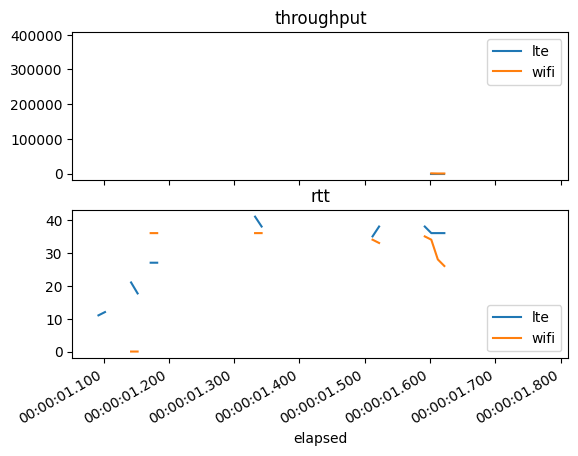

In [21]:
figure,axis =plt.subplots(2,1)


stats[stats["path"] == "lte"]["sent_bits"].resample("10ms").mean().diff().plot(label="lte",ax=axis[0])
stats[stats["path"] == "wifi"]["sent_bits"].resample("10ms").mean().diff().plot(label="wifi",ax=axis[0])
axis[0].legend()
axis[0].set_title("throughput")

stats[stats["path"] == "lte"]["rtt"].resample("10ms").mean().plot(label="lte",ax=axis[1])
stats[stats["path"] == "wifi"]["rtt"].resample("10ms").mean().plot(label="wifi",ax=axis[1])
axis[1].set_title("rtt")
axis[1].legend()
plt.gcf().autofmt_xdate()

## CWND and BIF

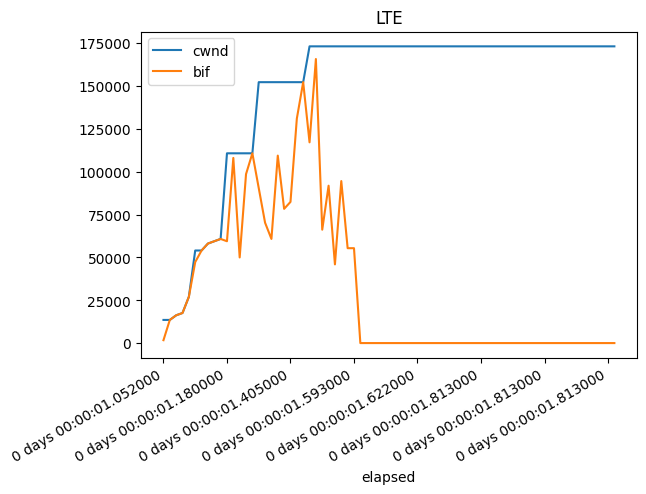

In [22]:
stats[stats["path"] == "lte"].plot(y=["cwnd","bif"])
plt.title("LTE")
plt.legend()
plt.gcf().autofmt_xdate()

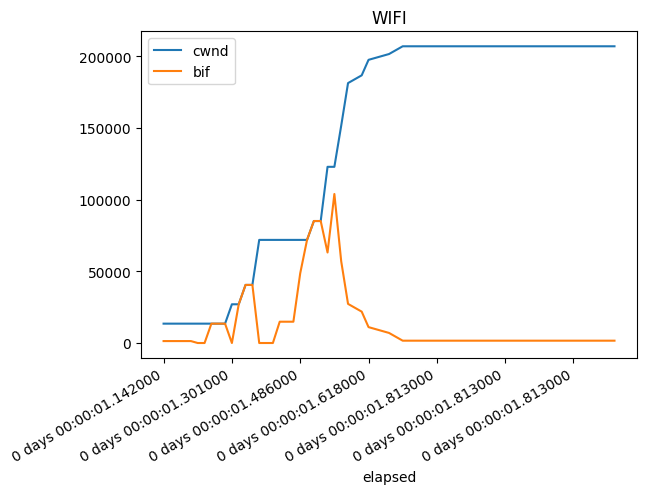

In [23]:
stats[stats["path"] == "wifi"].plot(y=["cwnd","bif"])
plt.title("WIFI")
plt.legend()



## Connection stats

In [24]:
conn = pd.read_csv("./{}-{}/conn-0.csv".format(TOPO, SCHED))

In [25]:
conn.index = pd.to_timedelta(conn["elapsed"], unit="ms")

Text(0.5, 1.0, 'Lost bytes')

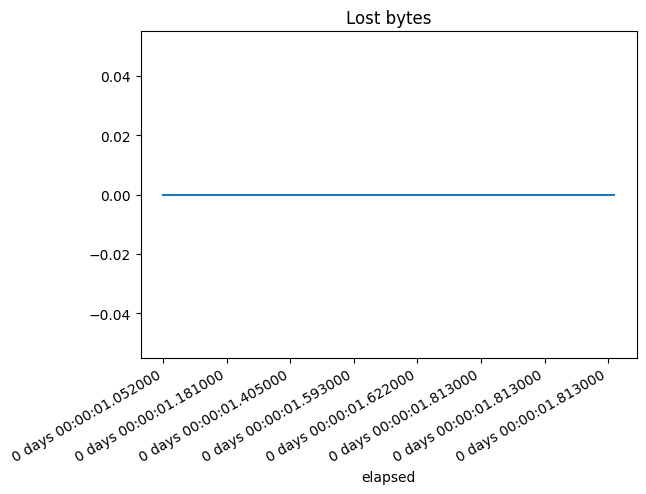

In [26]:
conn["lost_bytes_total"].plot()
plt.title("Lost bytes")


Text(0.5, 1.0, 'Sent bytes total')

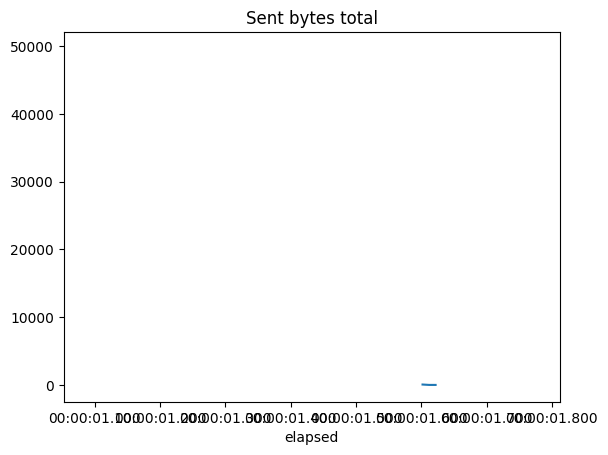

In [27]:
conn["sent_bytes_total"].resample("10ms").mean().diff().plot()
plt.title("Sent bytes total")

Text(0.5, 1.0, 'Burstiness')

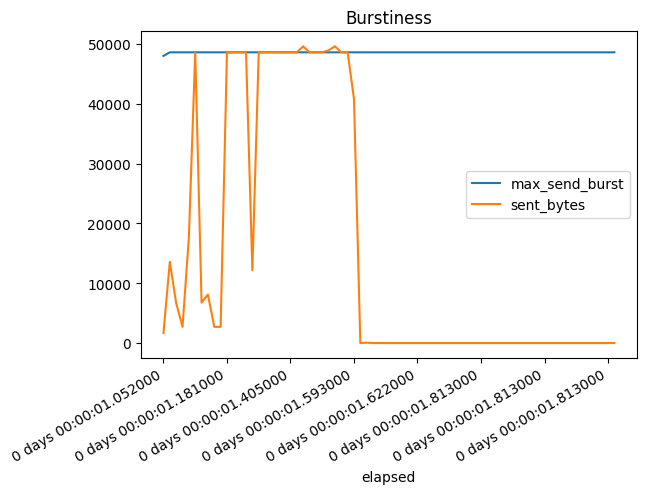

In [28]:
conn[["max_send_burst","sent_bytes"]].plot()
plt.title("Burstiness")